In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

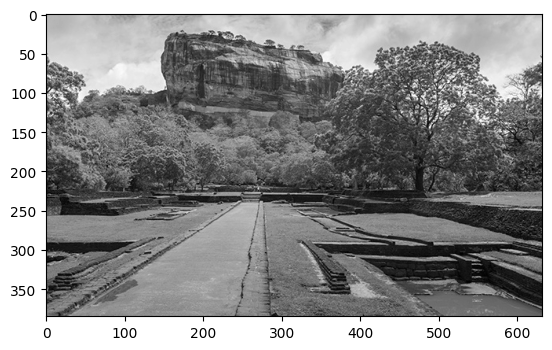

In [28]:
sigiriya_path = r"images\sigiriya.jpg"

image = cv.imread(sigiriya_path, cv.IMREAD_GRAYSCALE)

plt.plot(figsize=(4,4))
plt.imshow(image, cmap='gray')

Average filter and high frequency component

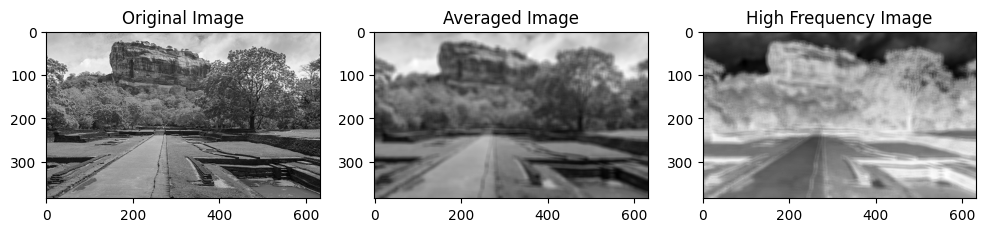

In [29]:
avg_kernel = np.ones(shape=(10,10), dtype=np.float32) / 9
averaged_img = cv.filter2D(image, cv.CV_32F, avg_kernel)

high_freq_img = image - averaged_img

fig, ax = plt.subplots(1, 3, figsize=(12,6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(averaged_img, cmap='gray')
ax[1].set_title('Averaged Image')

ax[2].imshow(high_freq_img, cmap='gray')
ax[2].set_title('High Frequency Image')

plt.show()
plt.show()

reconstruction

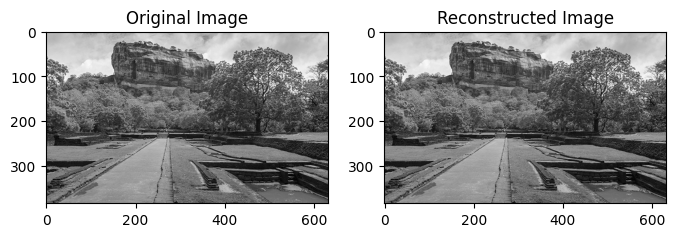

In [34]:
reconstructed_im = cv.add(averaged_img, high_freq_img)

fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(reconstructed_im, cmap='gray')
ax[1].set_title('Reconstructed Image')

plt.show()

### Sobel Filtering

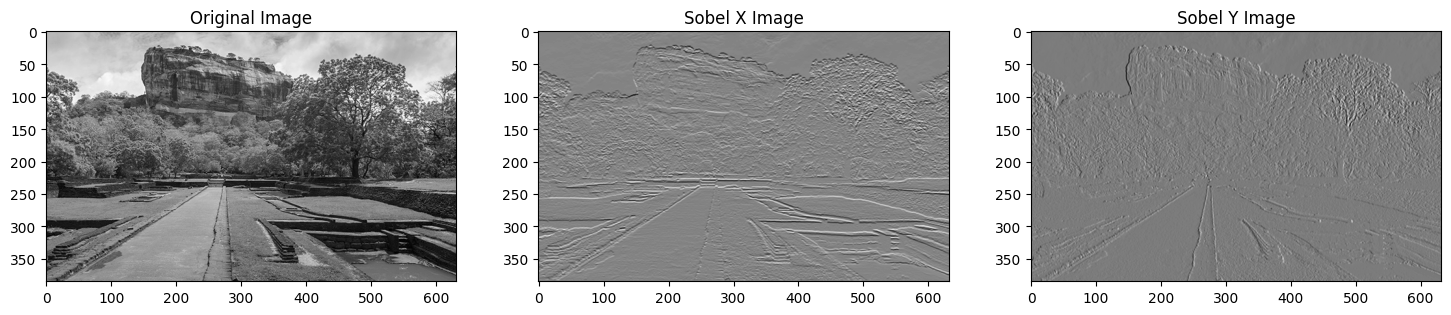

In [31]:
sobel_y = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_x = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

sobel_y_img = cv.filter2D(image, cv.CV_32F, sobel_y)
sobel_x_img = cv.filter2D(image, cv.CV_32F, sobel_x)

fig, ax = plt.subplots(1, 3, figsize=(18,6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(sobel_x_img, cmap='gray')
ax[1].set_title('Sobel X Image')

ax[2].imshow(sobel_y_img, cmap='gray')
ax[2].set_title('Sobel Y Image')

plt.show()

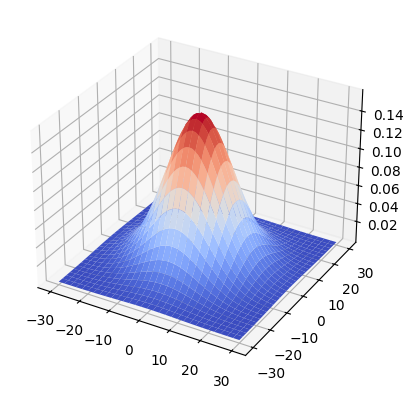

In [35]:
sigma = 10
hw = 3*sigma
x = np.linspace(-hw, hw, 2*hw+1)
y = np.linspace(-hw, hw, 2*hw+1)

X, Y = np.meshgrid(x, y)

G = 1/(2*np.pi) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Plot in 3-D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, G, cmap='coolwarm')
plt.show()